Exercise 3-1

In [54]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [55]:
resp = nsfg.ReadFemResp()

Below code is to define the variable numkdhh

In [57]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

Below code is to plot actual distribution for the number of children under 18 in the household. This number of children under 18 in a household is defined by the variable numkdhh above

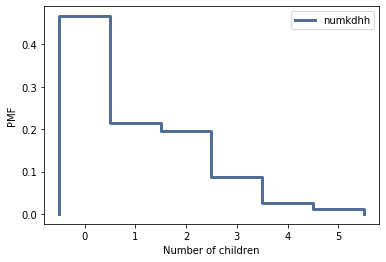

In [58]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

The book solution does not have the below code for Exercise 3-1. When I ran my code, I had an error that the Biaspmf was not defined, so I brought it this block of code and it worked.I am therefore wondering how the author's code worked when the Biaspmf was not defined in the solution

In [63]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf
    

In [64]:
biased = BiasPmf(pmf, label='biased')

Below code is to plot the the biased distribution

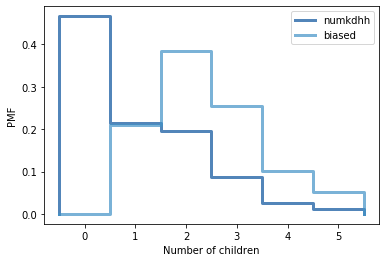

In [65]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

Code below compute the mean for the actual distribution 
Class size paradox tells us that students tend to experience a greater number of classmates than the true average class size because most of a large number of those experiences are in the classes with most students.The observed mean is therefore greater than the actual class size.In this case, the mean of the biased distribution is greater than the mean of the actual distribution, similar to the class size paradox.

In [61]:
pmf.Mean()

1.024205155043831

Code below computes the mean for the biased distribution

In [66]:
biased.Mean()

2.403679100664282

Exercise 3-2:

Code below is a function pmfMean that calculates the mean

In [71]:
def PmfMean(pmf):

    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

In [ ]:
Code below is a function pmfVar that calculates the variance

In [70]:
def PmfVar(pmf, mu=None):

    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var


Exercise 4-1:

In [83]:
live, firsts, others = first.MakeFrames()

In [91]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


In [89]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

Below code gives us the distribbution of birth weights

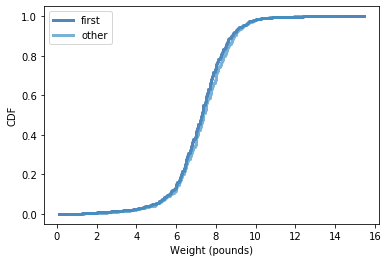

In [90]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

Below code takes in weight of first baby to return the percentile. However I am second child to my mom and weighed 8.1 at birth.Let's assume I was the first child, then my perecentile would have been 76.89 approximately 77 percentile rank

In [92]:
first_cdf.PercentileRank(8.1)

76.89663075865231

I was actually the second child and weighed 8.1 pounds at birth.My percentile is therefore 72.36 approximately 72 rank

In [93]:
other_cdf.PercentileRank(8.1)

72.36363636363636

Exercise 4-2 Below code Generates 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?


In [74]:
t = np.random.random(1000)
thinkplot.PrePlot(2)
print(t)

[3.36912623e-01 4.28586278e-01 1.24882919e-01 3.01796462e-01
 7.52488962e-01 7.26445099e-02 6.99914972e-01 6.18206768e-01
 1.66185474e-01 6.77994670e-02 4.42530502e-01 2.13120004e-01
 2.44196494e-01 9.84980913e-01 2.35224109e-01 5.57289311e-01
 9.15230410e-01 1.96529927e-01 2.76187794e-01 5.86872719e-01
 4.62959707e-01 4.91755602e-01 2.41878575e-01 3.88055334e-01
 4.03179900e-01 2.02012019e-01 5.59513804e-01 7.06324725e-01
 7.07139172e-01 9.19155434e-01 5.61440287e-01 8.20258558e-01
 7.85673062e-01 6.96816915e-01 2.39923854e-01 5.13327733e-01
 8.95457701e-01 7.85373901e-01 4.45799281e-01 8.25123777e-01
 5.19962727e-01 8.79885585e-01 3.95783048e-01 2.36171191e-01
 6.62135506e-01 8.09771397e-01 2.59623422e-02 4.90988305e-01
 1.79898018e-01 3.06243995e-01 8.52858884e-01 7.99550587e-01
 5.30502472e-01 2.19738366e-01 3.36215955e-01 9.81806851e-01
 7.09283036e-01 2.90780781e-01 5.43982331e-02 6.52521612e-01
 3.47960017e-01 1.76386733e-01 6.64618553e-01 4.24655793e-01
 6.85499315e-01 9.789163

<Figure size 432x288 with 0 Axes>

 Below code Plots pmf for 1000 random numbers generated above. The pmf is a uniform distribution because all values have the same frequency

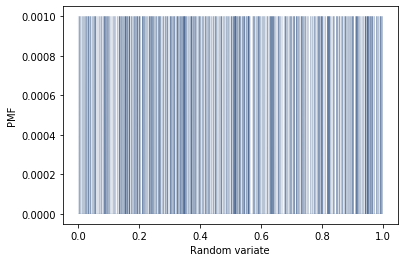

In [76]:
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

 Below code Plots cdf for 1000 random numbers generated above. The cdf distribution is not uniform because all values do not have the same frequency

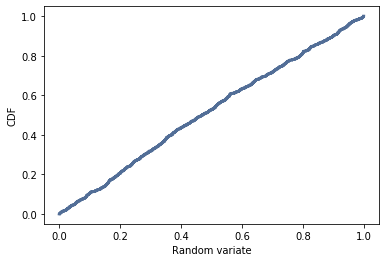

<Figure size 576x432 with 0 Axes>

In [77]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')
thinkplot.Show()

Please ignore the codes below!!!

Printing the value count for pregnum (variable)
It indicates how many times each respondent has been pregnant
The output seems to be correct because the total of 13593 matches the total in the code book

In [239]:
preg.pregnum.value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64>

The Histogram shows that most pregnancies have a length of 39 weeks. 39 weeks can therefore be used to represent the whole population because it has the highest frequency.It implies that a pregnancy duration of 39 weeks is pretty much normal.Ignoring the part of the Histogram represennting other babies and focusing on first babies.39 weeks still has the tallest bar.This means that most first babies are born at 39 weeks.Therefore the assumption that first babies arrive late is false 

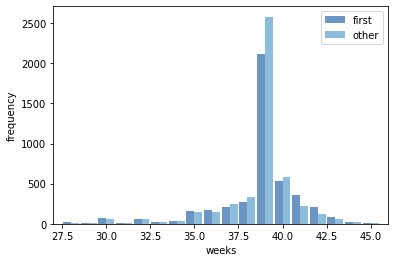

<Figure size 576x432 with 0 Axes>

In [285]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency',
xlim=[27, 46])


The below code displays the pregancy length in weeks.For example 4744 pregnancies had a length of 39 weeks, 1120 pregnancies had length of 40 weeks.39 weeks has the highest value (mode) as also indicated on this Histogram above.


In [249]:
preg.prglngth.value_counts()

39    4744
40    1120
38     609
9      594
41     591
6      543
37     457
13     446
4      412
8      409
35     357
36     329
42     328
17     253
11     202
30     198
5      181
7      175
12     170
3      151
43     148
22     147
10     137
32     122
26     117
2       78
34      60
33      50
44      46
16      44
15      39
28      38
21      37
19      34
24      31
31      29
14      29
29      23
20      18
18      17
0       15
25      15
23      12
45      10
1        9
27       8
48       7
50       2
46       1
47       1
Name: prglngth, dtype: int64

I am not sure why the below code is giving mode to be 7. I believe the mode should be 39 weeks. I ran the test mode code in the solution section and it said the assertion error

In [331]:
def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x
print(mode)

7.0


In [333]:
mode = Mode(hist)
print('Mode of preg length', mode)
assert(mode == 39)

Mode of preg length 7.0


AssertionError: 

To investigate whether first babies are lighter, we need a code that displays the weight of first babies, then we compare to the mean weight of 'not first babies (other babies).From the result of the code below, mean of first babies is 7.2 which is lesser than mean of other babies of 7.3.Therefore first babies are lighter than others

In [326]:
mean0 = live.totalwgt_lb.mean()
mean1 = firsts.totalwgt_lb.mean()
mean2 = others.totalwgt_lb.mean()

print('Mean')
print('First babies', mean1)
print('Others', mean2)

Mean
First babies 7.201094430437772
Others 7.325855614973262


In [254]:
preg.totalwgt_lb.value_counts()[7.5] 

302

In [255]:
preg.totalwgt_lb.value_counts()

7.5000     302
7.0000     301
7.3750     285
8.0000     265
7.6875     220
          ... 
15.4375      1
0.3125       1
0.1250       1
1.0000       1
13.5000      1
Name: totalwgt_lb, Length: 184, dtype: int64

In [236]:
# Printing column names
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [335]:
# Number of records with a 1st pregnancy count
preg.pregordr.value_counts()[1]

5033

In [336]:
preg.pregordr.value_counts()

1     5033
2     3766
3     2334
4     1224
5      613
6      308
7      158
8       78
9       38
10      17
11       8
12       5
13       3
14       3
18       1
19       1
17       1
16       1
15       1
Name: pregordr, dtype: int64

In [232]:
# A function that reads 2002FemResp.dat.gz
import numpy as np
import sys
import nsfg
import thinkstats2
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    #CleanFemResp(df)
    return df

In [202]:
def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ValidatePregnum(resp):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    """
    # read the pregnancy frame
    preg = nsfg.ReadFemPreg()

    # make the map from caseid to list of pregnancy indices
    preg_map = nsfg.MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


In [212]:
def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)
    assert(ValidatePregnum(resp))

    print('%s: All tests passed.' % script)


In [204]:
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.iteritems():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d

def main():

    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    # read and validate the pregnancy file
    preg = ReadFemPreg()
    print(preg.shape)

    assert len(preg) == 13593
    assert preg.caseid[13592] == 12571
    assert preg.pregordr.value_counts()[1] == 5033
    assert preg.nbrnaliv.value_counts()[1] == 8981
    assert preg.babysex.value_counts()[1] == 4641
    assert preg.birthwgt_lb.value_counts()[7] == 3049
    assert preg.birthwgt_oz.value_counts()[0] == 1037
    assert preg.prglngth.value_counts()[39] == 4744
    assert preg.outcome.value_counts()[1] == 9148
    assert preg.birthord.value_counts()[1] == 4413
    assert preg.agepreg.value_counts()[22.75] == 100
    assert preg.totalwgt_lb.value_counts()[7.5] == 302

    weights = preg.finalwgt.value_counts()
    key = max(weights.keys())
    assert preg.finalwgt.value_counts()[key] == 6

    # validate that the pregnum column in `resp` matches the number
    # of entries in `preg`
    assert(ValidatePregnum(resp, preg))

    
    print('All tests passed.')


if __name__ == '__main__':
    main()

(13593, 244)
All tests passed.


In [48]:
#Displaying dataframe
def main():
    resp = ReadFemResp()
    print(resp)
main()

      caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0       2298        1         5         5            1          5.0     27   
1       5012        1         5         1            5          5.0     42   
2      11586        1         5         1            5          5.0     43   
3       6794        5         5         4            1          5.0     15   
4        616        1         5         4            1          5.0     20   
...      ...      ...       ...       ...          ...          ...    ...   
7638   11018        1         5         2            5          3.0     34   
7639    6075        5         5         3            5          3.0     17   
7640    5649        1         5         2            5          5.0     29   
7641     501        5         5         3            5          2.0     16   
7642   10252        1         5         2            5          2.0     28   

      age_r  cmbirth  agescrn  ...  pubassis_i      basewgt  ad

In [22]:
#printing column names
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [21]:
#Selecting a single column name
preg.columns[1]

'pregordr'

In [23]:
#Selecting a column and check what type it is
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

In [24]:
#Printing a column
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

In [26]:
#Selecting a single element from the column
pregordr[0]

1

In [27]:
#Selecting a slice from a column
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [28]:
#Selecting a column using dot notation
pregordr = preg.pregordr

In [29]:
#Counting the number of times each value occurs
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [159]:
df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan

In [166]:
#Checking the values of another variable
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [31]:
#Making a dictionary that maps from each respondent's caseid 
#to a list of indices into the pregnancy DataFrame. 
#Use it to select the pregnancy outcomes for a single respondent.
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [54]:
def main():
     # Tests the all the functions in this module.
    resp = ReadFemResp()
    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)
    assert(ValidatePregnum(resp))
    print('All tests passed.')

In [80]:
#Selecting the birthord column and printing the value count
#The total of 13593 is the same as the total provided in the codebook
birthord = preg['birthord']
type(birthord)
print(birthord)

#The first respondent had 1 child, the 2nd had 2 children, the 3rd had 1 child,....respondent 13592 had 3 children

0        1.0
1        2.0
2        1.0
3        2.0
4        3.0
        ... 
13588    1.0
13589    NaN
13590    NaN
13591    2.0
13592    3.0
Name: birthord, Length: 13593, dtype: float64


In [90]:
#Selecting the `prglngth` column and printing the value counts
prglngth = preg['prglngth']
type(prglngth)
print(prglngth)

0        39
1        39
2        39
3        39
4        39
         ..
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64


In [95]:
#computing mean of birthweight in pounds
preg.totalwgt_lb.mean()

7.265628457623368

In [150]:
#Creating a new column totalwgt_kg
def CleanFemPreg(df):
    df.agepreg /= 100.0
na_vals = [97, 98, 99]
df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16
#The last line of this code above creates a new column totalwgt_lb

In [145]:
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0



In [83]:
#Using isnull to count the number of nans.
preg.birthord.isnull().sum()

4445

In [69]:
# importing data frame
>>> import nsfg
>>> df = nsfg.ReadFemPreg()
>>> df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


In [70]:
#Returning column names as unicode
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [151]:
>>> df.columns[1]

'pregordr'

In [152]:
prglngth

0        39
1        39
2        39
3        39
4        39
         ..
13588    39
13589     6
13590     5
13591    39
13592    39
Name: prglngth, Length: 13593, dtype: int64

In [154]:
#counting number of times each value appears
>>> df.outcome.value_counts().sort_index()


1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [156]:
#Displaying birthwight in lb and their counts e.g the count for baby weighing 15 pound is 1
>>> df.birthwgt_lb.value_counts(sort=False)


8.0     1889
7.0     3049
6.0     2223
4.0      229
5.0      697
10.0     132
12.0      10
14.0       3
3.0       98
1.0       40
2.0       53
0.0        8
9.0      623
11.0      26
13.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [180]:
#because of the way the data files are organized, we do processing to get pregnancy data for each respondent
def MakePregMap(df):
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


In [184]:
#code 4 is miscarriage, code 1 is life birth.This respondent had 6 miscarriages and 1 life birth
>>> caseid = 10229
>>> preg_map = nsfg.MakePregMap(df)
>>> indices = preg_map[caseid]
>>> df.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [185]:
preg = nsfg.ReadFemPreg()

In [190]:
 if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

            return True


SyntaxError: 'return' outside function (<ipython-input-190-16f8e864ba8a>, line 3)

In [199]:
 # read the pregnancy frame
preg = nsfg.ReadFemPreg()

    # make the map from caseid to list of pregnancy indices
preg_map = nsfg.MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

IndentationError: unexpected indent (<ipython-input-199-52373a2db368>, line 8)

In [223]:
#Printing the value count for birthord
preg.birthord.value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        2.0
2        1.0
3        2.0
4        3.0
        ... 
13588    1.0
13589    NaN
13590    NaN
13591    2.0
13592    3.0
Name: birthord, Length: 13593, dtype: float64>

In [217]:
# read and validate pregnancy file
preg = ReadFemPreg()
print(preg.shape)

(13593, 244)


In [222]:
#Printing the value count for pregnum
#It indicates howmany times each respondent has been pregnant
preg.pregnum.value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64>

In [225]:
 df.agepreg /= 100.0

In [228]:
#list the ages of the respondents
preg.agepreg.value_counts

<bound method IndexOpsMixin.value_counts of 0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
         ...  
13588    17.91
13589    18.50
13590    19.75
13591    21.58
13592    21.58
Name: agepreg, Length: 13593, dtype: float64>

In [262]:
>>> import thinkstats2
>>> hist = thinkstats2.Hist([1, 2, 2, 3, 5])
>>> hist


Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [272]:
>>> hist.Freq(2)

2

In [273]:
>>> hist.Values()




dict_keys([1, 2, 3, 5])

In [275]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))



1 1
2 2
3 1
5 1


In [277]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


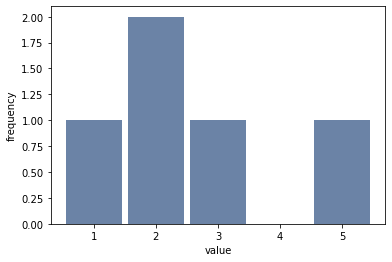

<Figure size 576x432 with 0 Axes>

In [278]:
>>> import thinkplot
>>> thinkplot.Hist(hist)
>>> thinkplot.Show(xlabel='value', ylabel='frequency')


In [279]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]


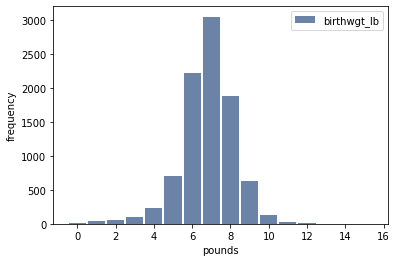

<Figure size 576x432 with 0 Axes>

In [280]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


In [282]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)


0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623


In [283]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

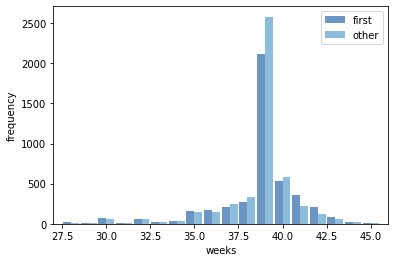

<Figure size 576x432 with 0 Axes>

In [284]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency',
xlim=[27, 46])


In [332]:
mode = Mode(hist)
print('Mode of preg length', mode)
assert(mode == 39)

Mode of preg length 7.0


AssertionError: 

In [307]:
modes = AllModes(hist)
assert(modes[0][1] == 4693)
for value, freq in modes[:5]:
    print(value, freq)

AssertionError: 

In [305]:
from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2


def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x



In [304]:

def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


In [310]:

def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.

    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

In [317]:
def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.

    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)


In [319]:
d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print('Cohen d', d)

Cohen d -0.088672927072602


In [325]:
mean0 = live.totalwgt_lb.mean()
mean1 = firsts.totalwgt_lb.mean()
mean2 = others.totalwgt_lb.mean()

print('Mean')
print('First babies', mean1)
print('Others', mean2)


Mean
First babies 7.201094430437772
Others 7.325855614973262


In [330]:
def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x
print(mode)

7.0


In [426]:
def main(script):
     # Tests the all the functions in this module.
    resp = ReadFemResp()
    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)
    assert(ValidatePregnum(resp))
    print('%s: All tests passed.' % script)

In [428]:
def main():
     # Tests the all the functions in this module.
    resp = ReadFemResp()
    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)
    assert(ValidatePregnum(resp))
    print('All tests passed.')